In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_completeness_v_measure
import numpy as np

## *Data*

In [2]:
data = pd.read_csv('train.csv')
data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
selected_features = ['battery_power','blue', 'dual_sim','fc','four_g','int_memory',
 'mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time',
 'three_g','touch_screen','wifi']
X, y_true = data[selected_features].to_numpy(), data['price_range'].to_numpy().reshape(-1,1)
print(X.shape, y_true.shape)

(2000, 17) (2000, 1)


## *K-Means algorithm*

In [4]:
def k_means(X, n_clusters, max_iters=10000):
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    
    for _ in range(max_iters):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        WSD = distances.min(axis=0).sum()
        
        labels = np.argmin(distances, axis=0)
        
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        if np.allclose(new_centroids, centroids, 1e-10, 1e-10):
            break
            
        centroids = new_centroids
    
    return centroids, labels, WSD

n_clusters=4
_centroids, _labels, _WSD = k_means(X, n_clusters)
print("Centroids:", _centroids)
print("Labels:", _labels)
print("Within-clusters sum of distances:", _WSD)

Centroids: [[1.24941766e+03 5.14431239e-01 5.48387097e-01 4.37181664e+00
  5.21222411e-01 3.29456706e+01 1.40634975e+02 9.95755518e+00
  6.31376910e+02 1.26171307e+03 3.45415959e+03 1.23446520e+01
  5.86078098e+00 1.09473684e+01 7.53820034e-01 4.90662139e-01
  5.17826825e-01]
 [1.25529836e+03 4.81967213e-01 5.18032787e-01 4.13442623e+00
  5.04918033e-01 3.21672131e+01 1.39101639e+02 9.51803279e+00
  1.10963934e+03 1.63515410e+03 9.88934426e+02 1.22262295e+01
  5.89508197e+00 1.08950820e+01 7.34426230e-01 5.18032787e-01
  5.01639344e-01]
 [1.20913766e+03 5.07911392e-01 4.93670886e-01 4.45727848e+00
  5.31645570e-01 3.17895570e+01 1.39960443e+02 1.01898734e+01
  6.22204114e+02 1.23468038e+03 2.29564873e+03 1.23069620e+01
  5.91930380e+00 1.11772152e+01 7.95886076e-01 5.04746835e-01
  5.20569620e-01]
 [1.25335232e+03 4.62025316e-01 4.76793249e-01 4.14767932e+00
  5.18987342e-01 3.11940928e+01 1.40892405e+02 9.75738397e+00
  3.93801688e+02 1.01443460e+03 9.73525316e+02 1.23101266e+01
  5.3

## *Metrics of quality of clusterization*

In [5]:
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(y_true.flatten(), _labels)

print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V_measure: {v_measure}")

Homogeneity: 0.47239625954993875
Completeness: 0.4843598327012717
V_measure: 0.47830324802204127


## *Optimal clusters number with Elbow method*

With elbow method number of clusters: 14
Completeness: 0.3314006798815981
Homogeneity: 0.6260716912064374
V_measure: 0.4333923158214209


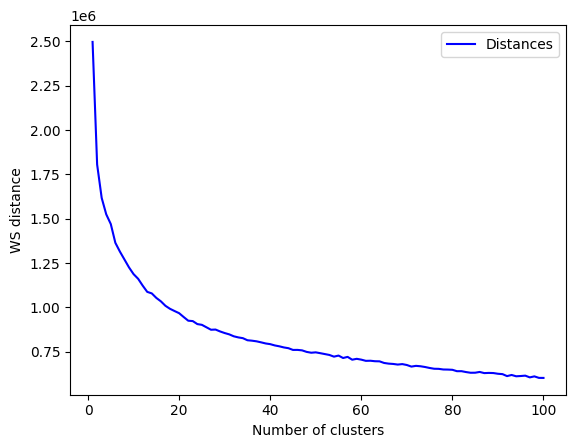

In [8]:
k_values = np.linspace(1, 100, 100)
WSD_values = np.zeros(100)

for i in k_values:
    WSD_values[int(i)-1] = k_means(X, int(i))[2]

for i in range(1, len(k_values)+1):
    if abs((WSD_values[int(i)] - WSD_values[int(i)-1])/WSD_values[int(i)]) < 0.01:
        print("With elbow method number of clusters:", i+1)
        homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(y_true.flatten(), k_means(X, int(i+1))[1])
        print(f"Completeness: {completeness}")
        print(f"Homogeneity: {homogeneity}")
        print(f"V_measure: {v_measure}")
        break 

plt.plot(k_values, WSD_values, label = 'Distances', color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('WS distance')
plt.legend()
plt.show()

## *Clusters visualization*

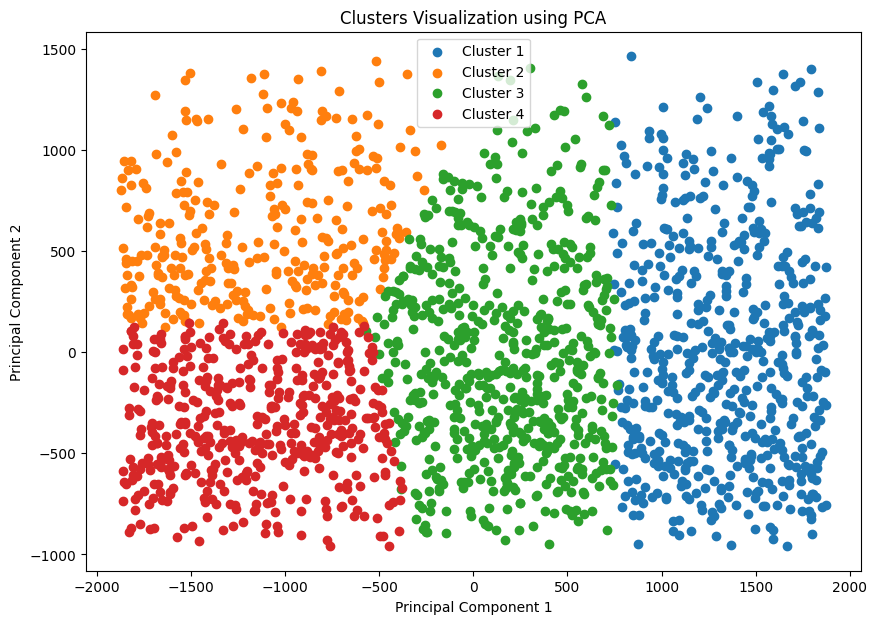

In [10]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
for i in range(n_clusters):
    plt.scatter(X_pca[_labels == i, 0], X_pca[_labels == i, 1], label=f'Cluster {i+1}')
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()